## Task 1

## Netflix Stock Price Prediction

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

### Exploratory data analysis

In [4]:
df=pd.read_csv(r"Netflix.csv")

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(1009, 7)

In [12]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [13]:
df['Date'].nunique()

1009

### Missing date check and adding dates

In [14]:
from datetime import datetime
a =df['Date'].min()
b =df['Date'].max()
A1 = datetime.strptime(b, "%Y-%m-%d")
B2 = datetime.strptime(a, "%Y-%m-%d")
diff = B2-A1
print(f'Difference is {diff.days} days')

Difference is -1460 days


In [15]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [16]:
df = df.resample('D').ffill().reset_index()
df['Date'].nunique()

1461

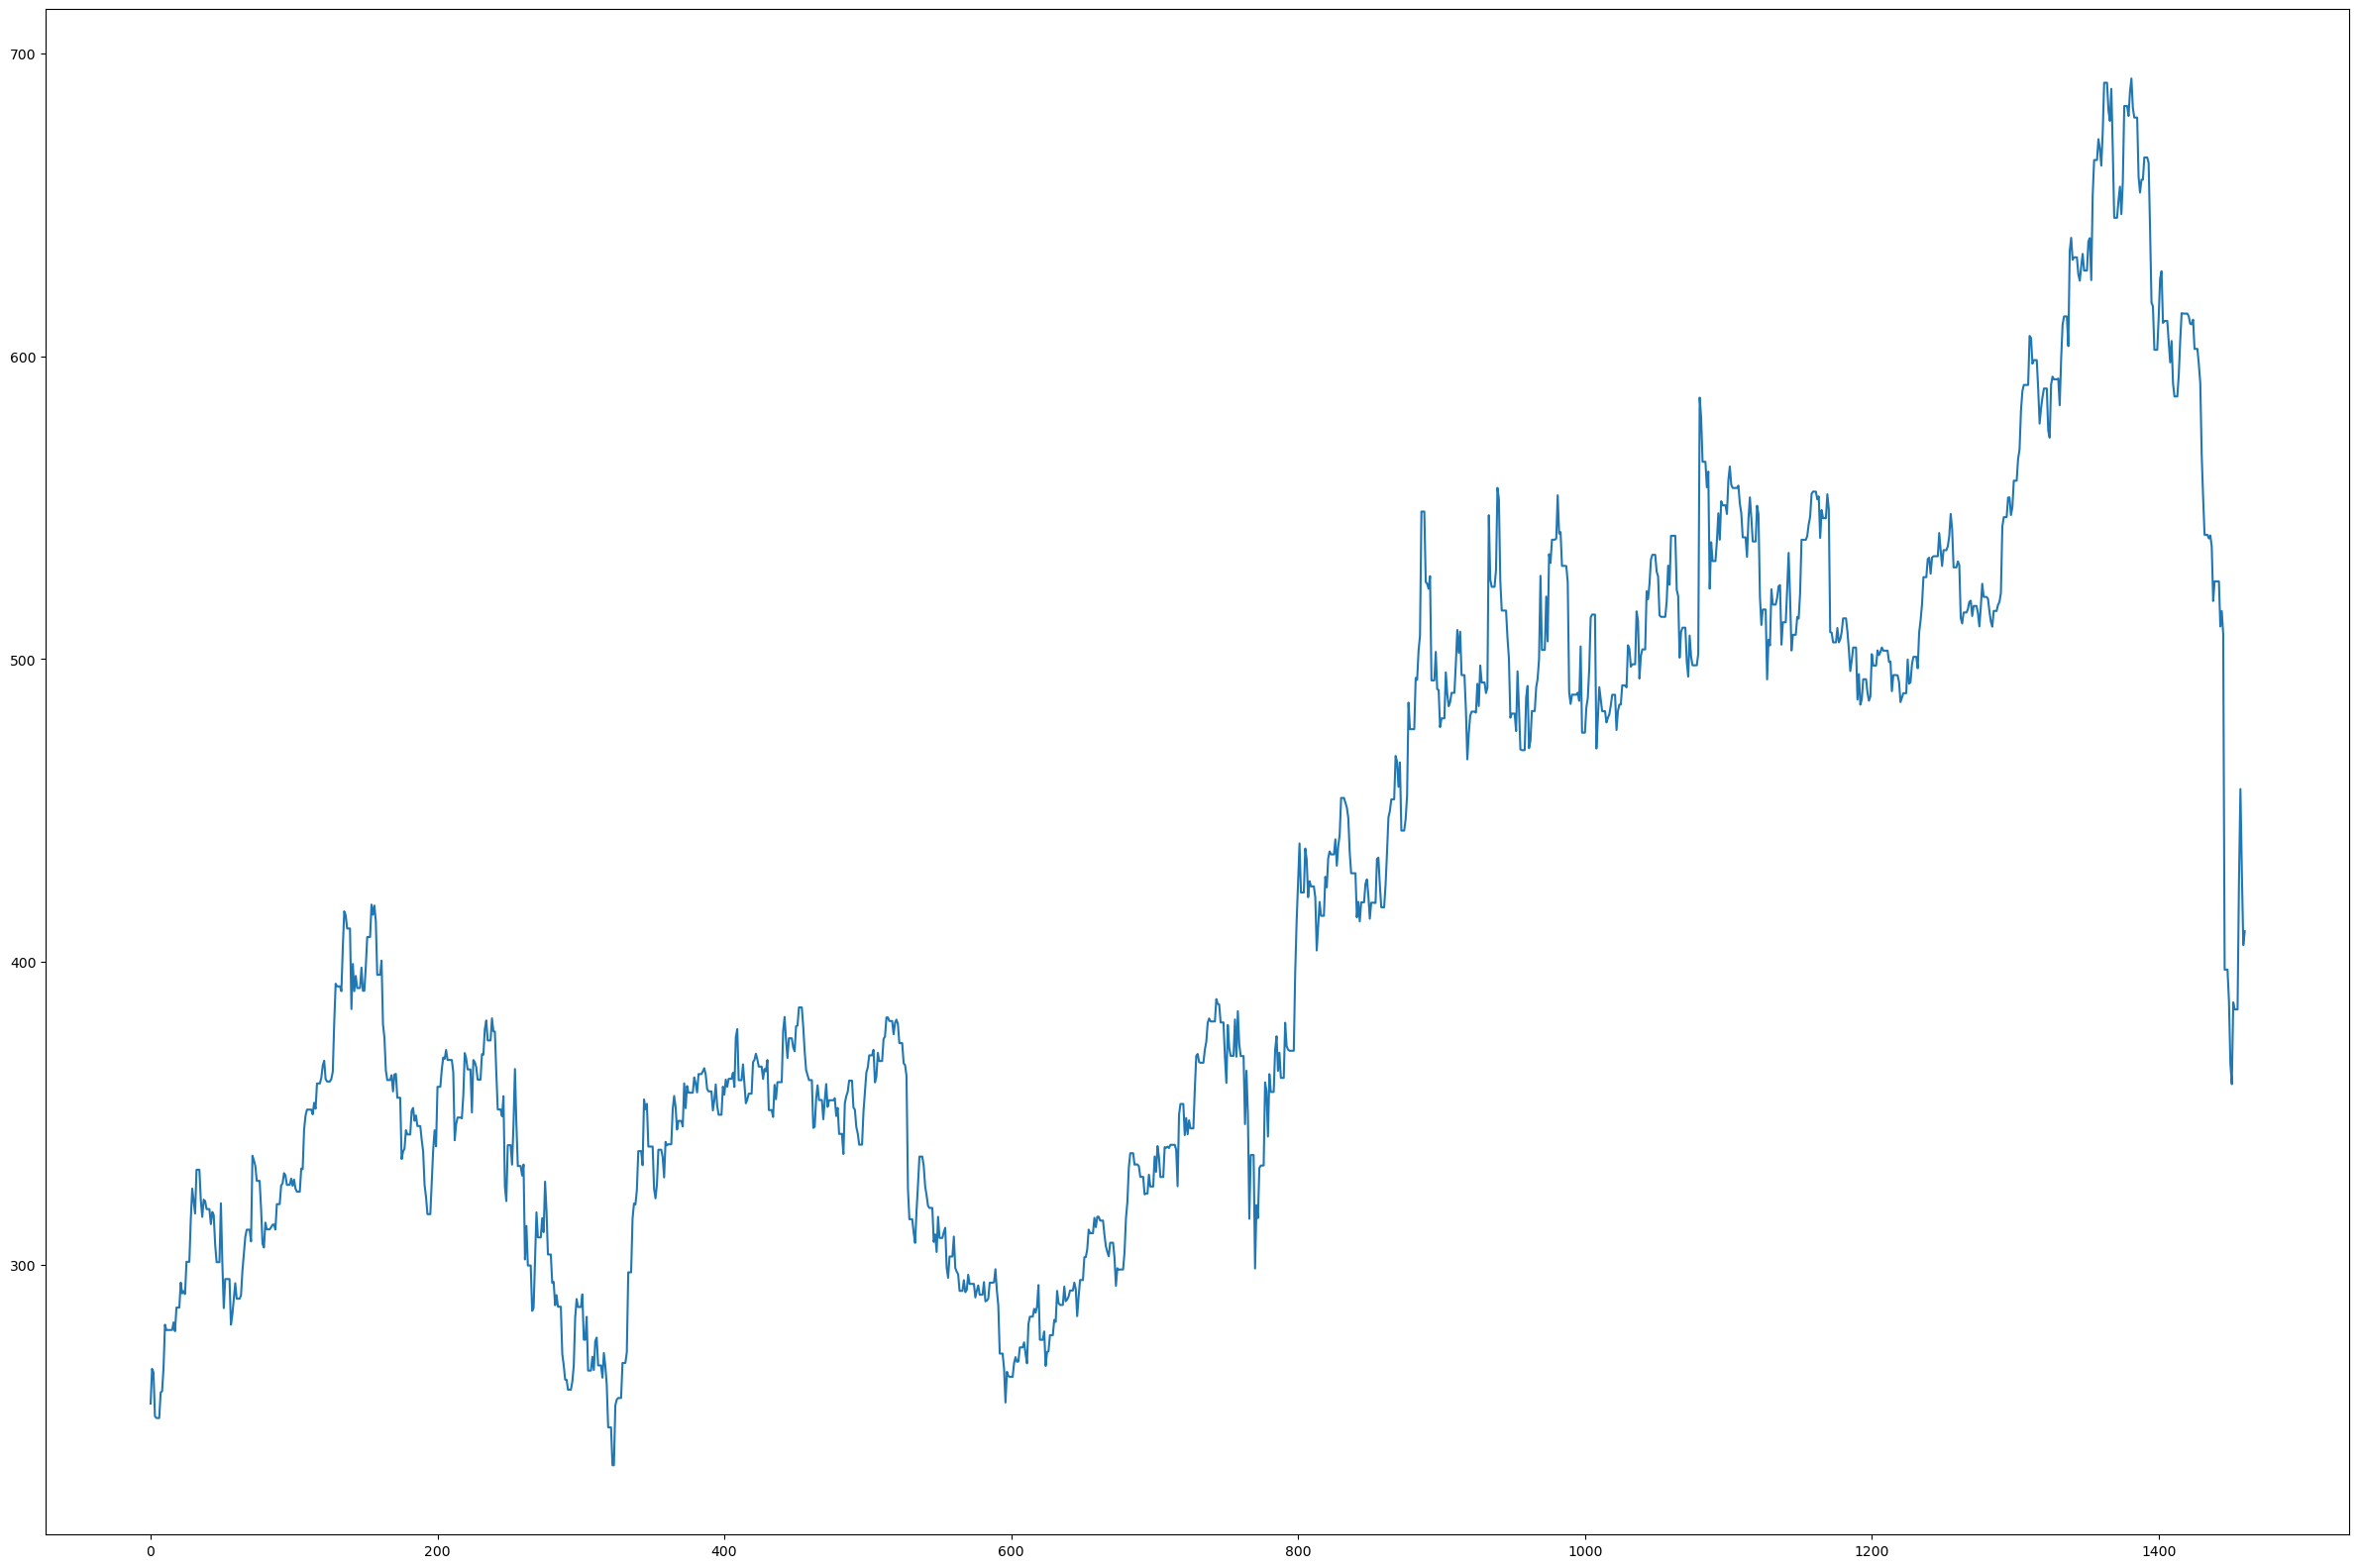

In [17]:
plt.figure(figsize=(30,20))
plt.plot(df['Close'])
plt.show()

In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1456,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1457,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1458,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1459,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


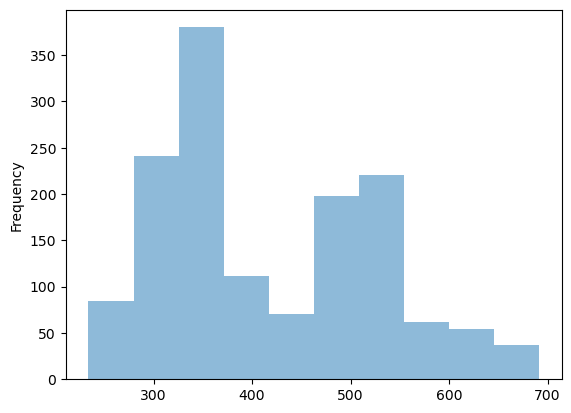

In [19]:
df["Close"].plot.hist(alpha=0.5)
plt.show()

### Splitting data

In [20]:
train_df=df[:900] 
test_df=df[900:]

In [21]:
train_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-10,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
6,2018-02-11,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
7,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
8,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
9,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000


In [22]:
test_df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1451,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1452,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1453,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1454,2022-01-29,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1455,2022-01-30,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1456,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1457,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1458,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1459,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1460,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [23]:
train=train_df.loc[:,["Open"]].values

In [24]:
len(train)

900

### Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
Mn=MinMaxScaler(feature_range=(0,1))
train_scaled=Mn.fit_transform(train)

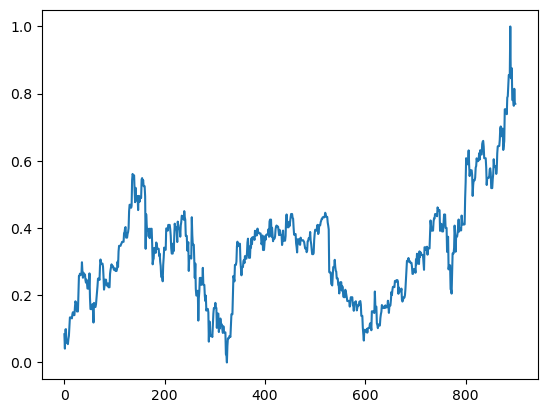

In [26]:
plt.plot(train_scaled)
plt.show()

In [27]:
x_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,len(train_scaled)):
    x_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [28]:
len(x_train)

850

In [29]:
len(y_train)

850

In [30]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [31]:
x_train

array([[[0.08405677],
        [0.04125007],
        [0.09776684],
        ...,
        [0.21999045],
        [0.21999045],
        [0.22582767]],

       [[0.04125007],
        [0.09776684],
        [0.09926358],
        ...,
        [0.21999045],
        [0.22582767],
        [0.265132  ]],

       [[0.09776684],
        [0.09926358],
        [0.05965997],
        ...,
        [0.22582767],
        [0.265132  ],
        [0.19298934]],

       ...,

       [[0.55352332],
        [0.5745974 ],
        [0.5778304 ],
        ...,
        [0.78114713],
        [0.78114713],
        [0.76399458]],

       [[0.5745974 ],
        [0.5778304 ],
        [0.56418017],
        ...,
        [0.78114713],
        [0.76399458],
        [0.81446452]],

       [[0.5778304 ],
        [0.56418017],
        [0.51897869],
        ...,
        [0.76399458],
        [0.81446452],
        [0.77312464]]])

In [32]:
import seaborn as sns

In [33]:
dt=df.corr()
dt


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998737,0.998510,0.997024,0.997024,-0.409946
High,0.998737,1.000000,0.998237,0.998603,0.998603,-0.396414
Low,0.998510,0.998237,1.000000,0.998571,0.998571,-0.427437
Close,0.997024,0.998603,0.998571,1.000000,1.000000,-0.409661
Adj Close,0.997024,0.998603,0.998571,1.000000,1.000000,-0.409661
Volume,-0.409946,-0.396414,-0.427437,-0.409661,-0.409661,1.000000


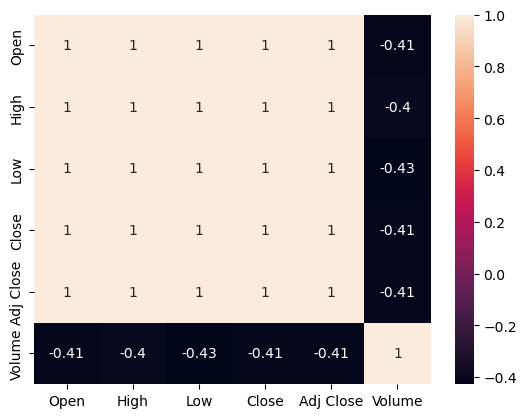

In [34]:
sns.heatmap(dt,annot=True)
plt.show()

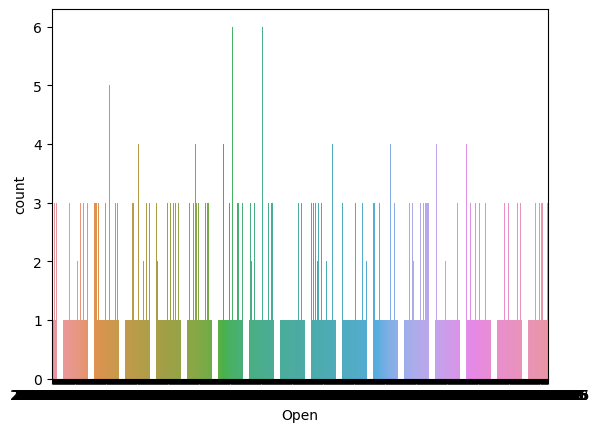

In [35]:
sns.countplot(x=df["Open"])
plt.show()

### Modelling

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [37]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
27/27 [==============================] - 20s 149ms/step - loss: 0.0253
Epoch 2/10
27/27 [==============================] - 4s 142ms/step - loss: 0.0074
Epoch 3/10
27/27 [==============================] - 4s 146ms/step - loss: 0.0059
Epoch 4/10
27/27 [==============================] - 4s 147ms/step - loss: 0.0063
Epoch 5/10
27/27 [==============================] - 4s 144ms/step - loss: 0.0054
Epoch 6/10
27/27 [==============================] - 4s 145ms/step - loss: 0.0049
Epoch 7/10
27/27 [==============================] - 4s 144ms/step - loss: 0.0050
Epoch 8/10
27/27 [==============================] - 4s 146ms/step - loss: 0.0051
Epoch 9/10
27/27 [==============================] - 4s 145ms/step - loss: 0.0047
Epoch 10/10
27/27 [==============================] - 4s 145ms/step - loss: 0.0047


In [38]:
dataset=pd.concat((train_df["Open"],test_df["Open"]), axis=0)
inputs= dataset[len(dataset)-len(test_df)-timesteps:].values.reshape(-1,1)
inputs=Mn.transform(inputs)

### Predicted Netflix Stock Price

In [39]:
#prediction
x_test=[]
for i in range(timesteps,timesteps+len(test_df)):
    x_test.append(inputs[i-timesteps:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=model.predict(x_test)
predicted_stock_price=Mn.inverse_transform(predicted_stock_price)#we had scaled between 0-1 data, inversing it

18/18 [==============================] - 4s 48ms/step


In [40]:
real_stock_price=test_df.loc[:,["Open"]].values

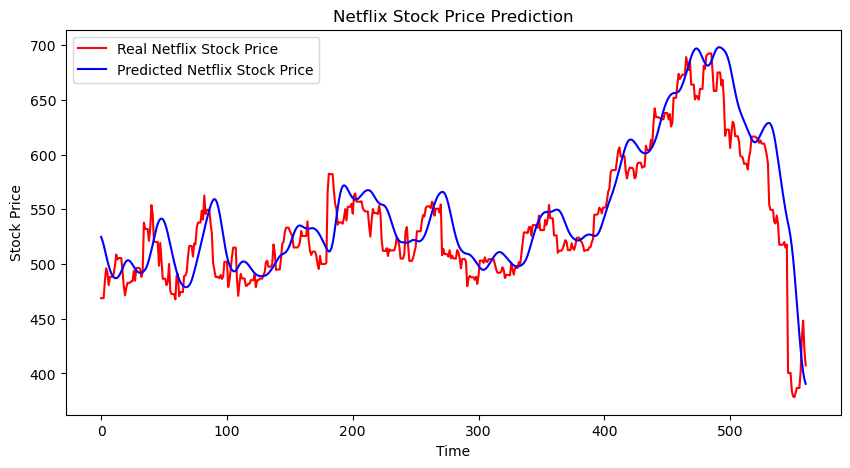

In [41]:
plt.figure(figsize=(10,5))
plt.plot(real_stock_price,color="red",label="Real Netflix Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Netflix Stock Price")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()